In [2]:
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
import os

In [3]:
def load_images_from_folder(direct):
    images = []
    y = []
    for filename in os.listdir(direct):
        image = None
        if filename.endswith('jpeg'):
            img = load_img(path=direct+filename, target_size=(224,224))
        elif filename.endswith('jpg'):
            img = load_img(path=direct+filename, target_size=(224,224))
        if img is not None :
            img = img_to_array(img)
            images.append(img)
            if(filename.startswith('dog')):
                y.append(1)
            else:
                y.append(0)
    return images, y

In [4]:
images, labels = load_images_from_folder('dataset/')

In [5]:
images = np.array(images)
labels = np.array(labels)
print(images.shape)
print(labels.shape)

(535, 224, 224, 3)
(535,)


In [7]:
import sklearn.cross_validation as cv
X_train, X_test, Y_train, Y_test = cv.train_test_split(images, labels, test_size=0.24)

In [9]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD, Adam
from keras.applications.vgg19 import VGG19

In [10]:
base_model = VGG19(weights = "imagenet", include_top=False)

In [11]:
train_output_bm = base_model.predict(X_train)

In [12]:
test_output_bm = base_model.predict(X_test)

In [14]:
model = Sequential()
model.add(Flatten(input_shape=train_output_bm.shape[1:]))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = "binary_crossentropy", optimizer = 'rmsprop', metrics=["accuracy"])

In [15]:
model.fit(train_output_bm, Y_train,epochs=50, batch_size=16,validation_data=(test_output_bm, Y_test))

Train on 406 samples, validate on 129 samples
Epoch 1/50
406/406 [==============================] - 1s 3ms/step - loss: 7.5947 - acc: 0.5123 - val_loss: 7.7858 - val_acc: 0.5116
Epoch 2/50
406/406 [==============================] - 1s 2ms/step - loss: 7.3822 - acc: 0.5369 - val_loss: 7.7858 - val_acc: 0.5116
Epoch 3/50
406/406 [==============================] - 1s 2ms/step - loss: 7.3822 - acc: 0.5369 - val_loss: 7.7858 - val_acc: 0.5116
Epoch 4/50
406/406 [==============================] - 1s 2ms/step - loss: 6.4009 - acc: 0.5985 - val_loss: 2.2530 - val_acc: 0.8450
Epoch 5/50
406/406 [==============================] - 1s 2ms/step - loss: 2.2651 - acc: 0.8498 - val_loss: 1.4092 - val_acc: 0.9070
Epoch 6/50
406/406 [==============================] - 1s 3ms/step - loss: 1.2779 - acc: 0.9163 - val_loss: 1.8715 - val_acc: 0.8837
Epoch 7/50
406/406 [==============================] - 1s 3ms/step - loss: 1.2060 - acc: 0.9138 - val_loss: 1.3302 - val_acc: 0.9070
Epoch 8/50
406/406 [==========

In [16]:
model.save_weights('tfe_vgg19.h5')

In [54]:
test_images = []
for filename in os.listdir('fresh_images_test/'):
    if(filename.endswith('jpg') or filename.endswith('jpeg')):
        img = load_img(path='fresh_images_test/'+filename, target_size=(224,224))
        img = img_to_array(img)
        test_images.append(img)
test_images = np.array(test_images)
print(test_images.shape)

(10, 224, 224, 3)


In [55]:
import matplotlib.pyplot as plt

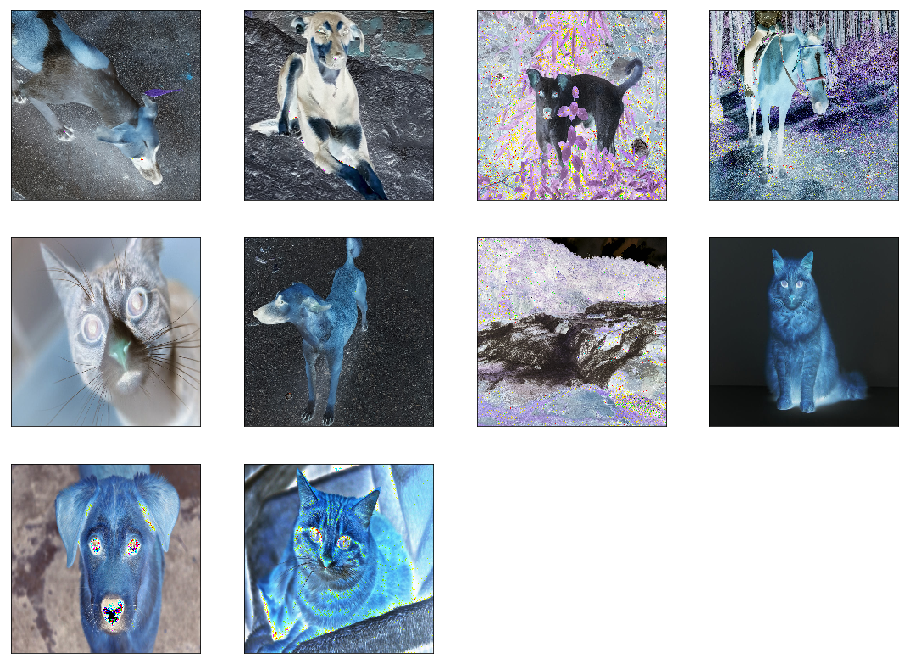

In [59]:
fig = plt.figure(figsize = (16,16))
for i in range(10):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(test_images[i])
plt.show()

In [60]:
pred= base_model.predict(test_images)
print(model.predict(pred))

[[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


**This model wrongly labelled the horse as a dog as there weren't any other horse pictures in the training set. the horse head has been wrongly mistaken as a dog** 
<br>
But it understands the difference between cats and dogs very well.